In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import plot, show, savefig, xlim, figure,  ylim, legend, boxplot, setp, axes

In [32]:
df = pd.read_csv('data.csv')
df.head()

,index,totalCarNumber,numberOfTrips,median_overhead,q1_overhead,q3_overhead,p9_overhead
0,0,450,1027,1.705098,1.361006,2.164053,2.692238
1,1,450,1499,1.727320,1.369163,2.129631,2.613873
2,2,450,1453,1.743381,1.381928,2.174329,2.682936
3,3,450,1453,1.714911,1.377398,2.135770,2.587425
4,4,450,1511,1.735254,1.388179,2.166079,2.671485


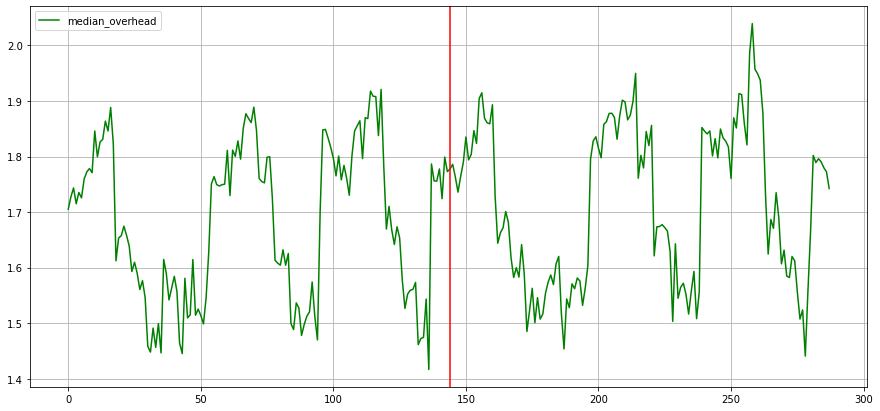

In [33]:
dd = df.plot(y='median_overhead', c='g', figsize= (15,7), grid=True)
dd = plt.axvline(x=144, color='r')

In [34]:
df['numberOfTrips'].sum()

278724

In [35]:
df =  pd.read_csv('raw_data.csv')
df.columns =["start", "total", 'overhead', 'duration']

df['c'] = df['total'].diff()
df_filtered = df[df['c'] != 0]

index_list = df_filtered.index.tolist() # list of the start poisitions of index for change of values 
print(len(index_list))
print('\n')
print(index_list)

l_mod = index_list + [max(index_list)+1] # creating a list of indexes to iterate over (must have 0 in it)
list_of_dfs = [df.iloc[l_mod[n]:l_mod[n+1]] for n in range(len(l_mod)-1)] # creating a list of dfs for each index

len(list_of_dfs)

47


[0, 8400, 17698, 28225, 35060, 38853, 39520, 43305, 43974, 46842, 55713, 65181, 75416, 84244, 90044, 93305, 101962, 109982, 118870, 128100, 133868, 137627, 138624, 147105, 154548, 163253, 173064, 179528, 183259, 183915, 188492, 189110, 190705, 197505, 204732, 212634, 219344, 223157, 225257, 233297, 240864, 249330, 258248, 263866, 267274, 267998, 276857]


47

In [36]:
data = pd.DataFrame(columns=['avg', 'var', 'std', 'median', 'q1', 'q3', 'p90', 'cars'])
avg, var, std, median, q1, q3, p90, mode = [], [], [], [], [], [], [], []


for frame in list_of_dfs:
    median.append(frame['overhead'].median())
    avg.append(frame['overhead'].mean())
    q1.append(frame['overhead'].quantile(q =.25))
    q3.append(frame['overhead'].quantile(q =.75))
    p90.append(frame['overhead'].quantile(q =.9))
    mode.append(frame['total'].mode()[0]) # mode returns a series so we need to specify which value to return
    var.append(frame['overhead'].var())
    std.append(frame['overhead'].std())

    
    
data['median'] = median
data['q1'] = q1
data['q3'] = q3
data['p90']= p90
data['cars'] = mode
data['avg'] = avg
data['var'] = var
data['std'] = std
data.head()

,avg,var,std,median,q1,q3,p90,cars
0,1.857695,0.474462,0.688812,1.727229,1.376715,2.150205,2.649876,450
1,1.983529,1.594580,1.262767,1.788289,1.395418,2.252985,2.867880,520
2,2.119490,2.753929,1.659497,1.846738,1.405932,2.378683,3.137872,600
3,1.749843,0.360357,0.600297,1.652856,1.351360,2.005824,2.423158,350
4,1.657957,0.256846,0.506800,1.576287,1.313798,1.876428,2.239168,200


In [37]:
data.fillna(method = "ffill",inplace=True)


In [38]:
df1 = data.iloc[:23, :].reset_index(drop=True)
df2 = data.iloc[23:, :].reset_index(drop=True)
df1.head()

,avg,var,std,median,q1,q3,p90,cars
0,1.857695,0.474462,0.688812,1.727229,1.376715,2.150205,2.649876,450
1,1.983529,1.594580,1.262767,1.788289,1.395418,2.252985,2.867880,520
2,2.119490,2.753929,1.659497,1.846738,1.405932,2.378683,3.137872,600
3,1.749843,0.360357,0.600297,1.652856,1.351360,2.005824,2.423158,350
4,1.657957,0.256846,0.506800,1.576287,1.313798,1.876428,2.239168,200


In [39]:
df2 =  df2.rename(columns={'avg': 'a', 'var': 'v', 'std': 's', 'median':'m', 'q1':'one', 'q3':'three', 'p90': 'nine'})
df2.head()

,a,v,s,m,one,three,nine,cars
0,1.936797,0.760301,0.871953,1.767096,1.389496,2.215107,2.788206,450
1,2.100997,2.554775,1.598366,1.819563,1.409964,2.363666,3.120184,520
2,2.231258,3.491697,1.868608,1.880611,1.436229,2.459482,3.383778,600
3,1.804272,0.475636,0.689664,1.671038,1.357358,2.042491,2.502894,350
4,1.739381,0.512150,0.715646,1.593957,1.312176,1.962632,2.379462,200


Text(0.5, 0, 'Time')

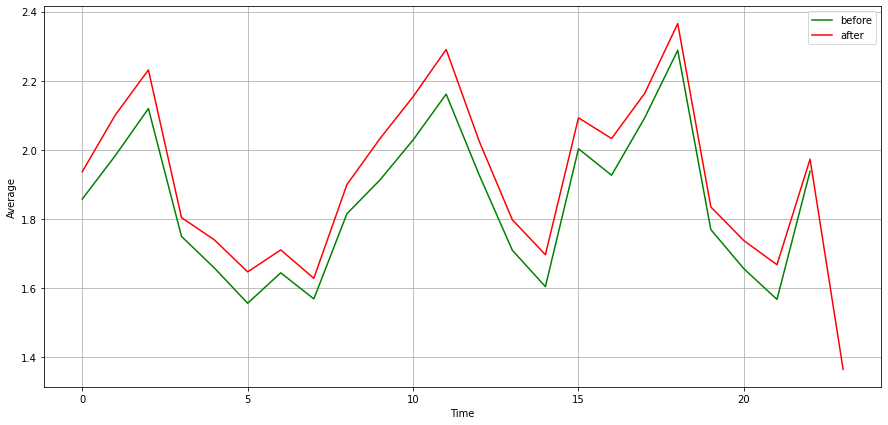

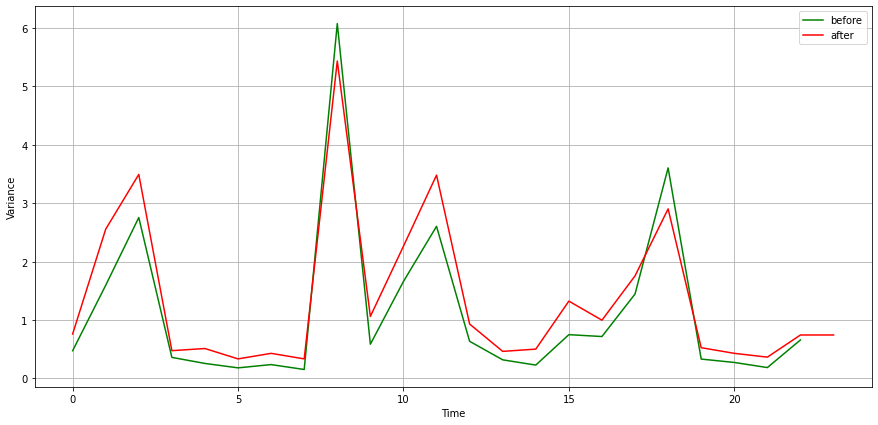

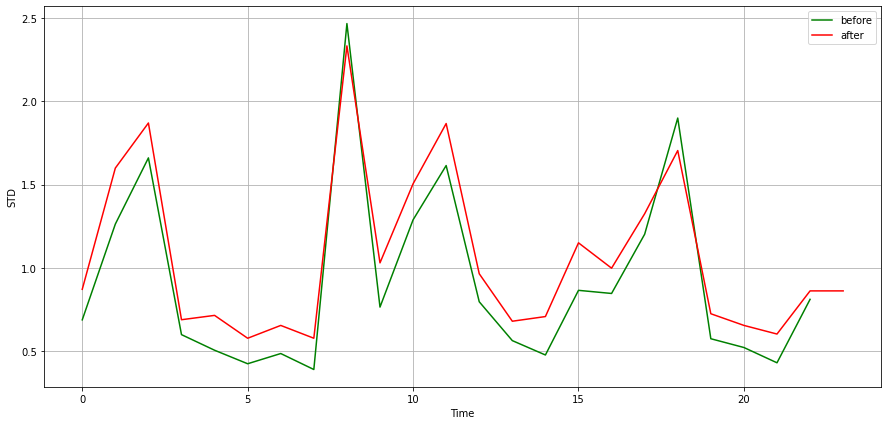

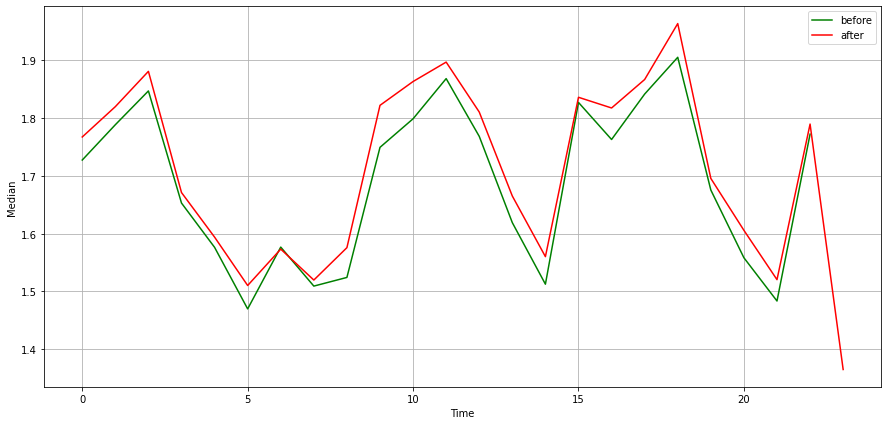

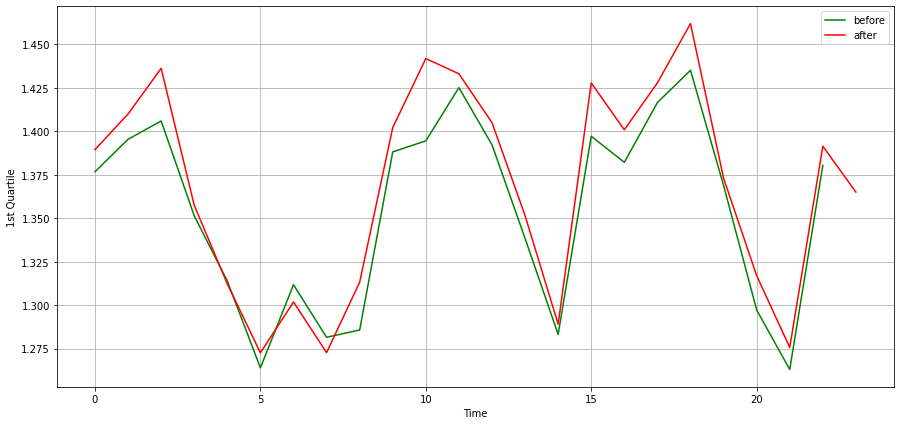

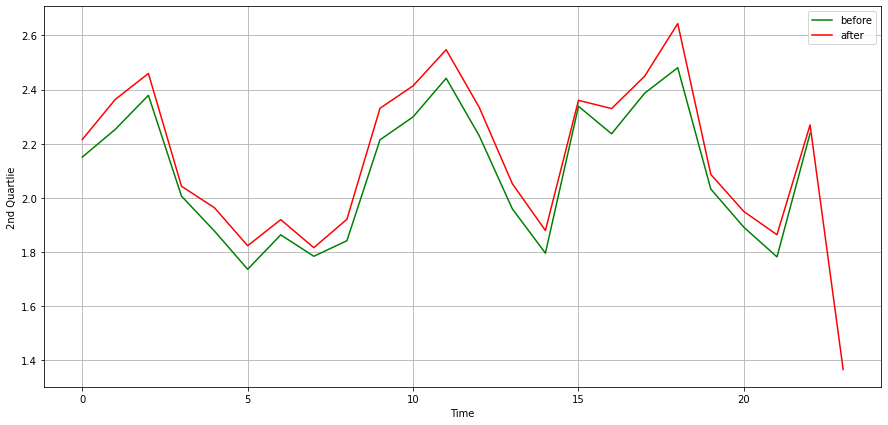

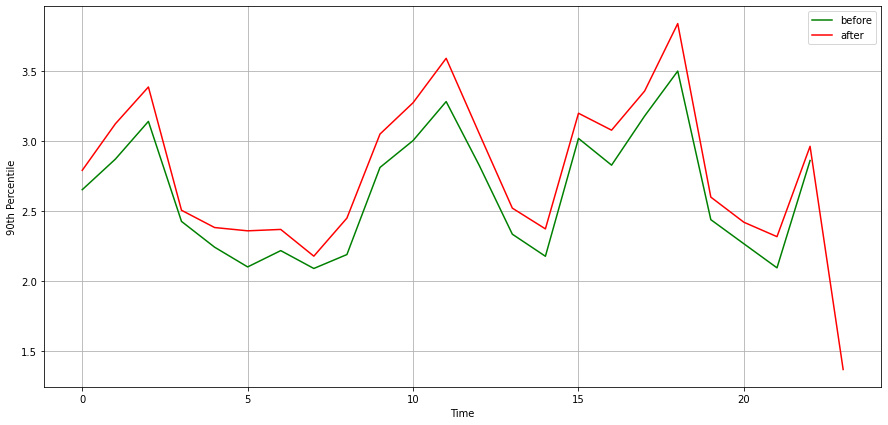

In [10]:
ax1 = df1.plot(y='avg', c='g', figsize= (15,7), grid=True, label = 'before')
ax2 = df2.plot(y='a', c='r', figsize= (15,7), grid=True, ax=ax1, label='after')
ax2.set_ylabel("Average")
ax2.set_xlabel("Time")

ax3 = df1.plot(y='var', c='g', figsize= (15,7), grid=True, label = 'before')
ax4 = df2.plot(y='v', c='r', figsize= (15,7), grid=True, ax=ax3, label='after')
ax4.set_ylabel("Variance")
ax4.set_xlabel("Time")

ax5 = df1.plot(y='std', c='g', figsize= (15,7), grid=True, label = 'before')
ax6 = df2.plot(y='s', c='r', figsize= (15,7), grid=True, ax=ax5, label='after')
ax6.set_ylabel("STD")
ax6.set_xlabel("Time")

ax7 = df1.plot(y='median', c='g', figsize= (15,7), grid=True, label = 'before')
ax8 = df2.plot(y='m', c='r', figsize= (15,7), grid=True, ax=ax7, label='after')
ax8.set_ylabel("Median")
ax8.set_xlabel("Time")

ax9 = df1.plot(y='q1', c='g', figsize= (15,7), grid=True, label = 'before')
ax10 = df2.plot(y='one', c='r', figsize= (15,7), grid=True, ax=ax9, label='after')
ax10.set_ylabel("1st Quartile")
ax10.set_xlabel("Time")

ax11 = df1.plot(y='q3', c='g', figsize= (15,7), grid=True, label = 'before')
ax12 = df2.plot(y='three', c='r', figsize= (15,7), grid=True, ax=ax11, label='after')
ax12.set_ylabel("2nd Quartlie")
ax12.set_xlabel("Time")

ax13 = df1.plot(y='p90', c='g', figsize= (15,7), grid=True, label = 'before')
ax14 = df2.plot(y='nine', c='r', figsize= (15,7), grid=True, ax=ax13, label='after')
ax14.set_ylabel("90th Percentile")
ax14.set_xlabel("Time")

Text(0.5, 1.0, 'Situation 3')

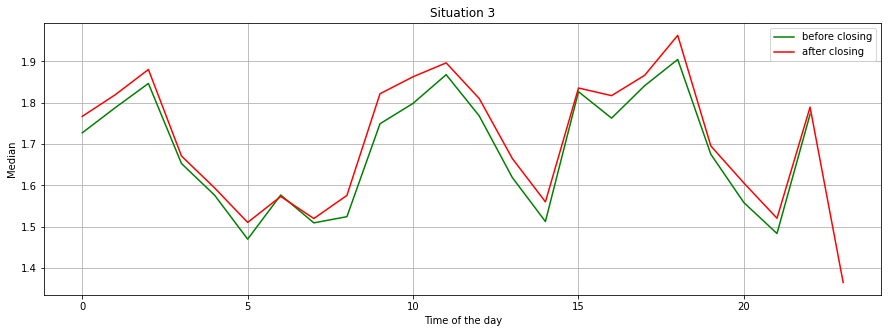

In [19]:
ax7 = df1.plot(y='median', c='g', figsize= (15,5), grid=True, label = 'before closing')
ax8 = df2.plot(y='m', c='r', figsize= (15,5), grid=True, ax=ax7, label='after closing')
ax8.set_ylabel("Median")
ax8.set_xlabel("Time of the day")
ax8.set_title("Situation 3")

Text(0.5, 1.0, 'Situation 3')

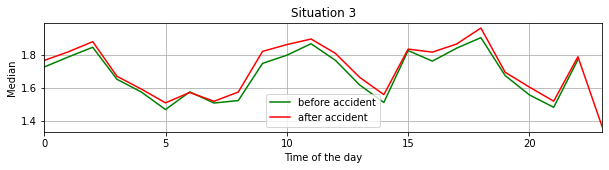

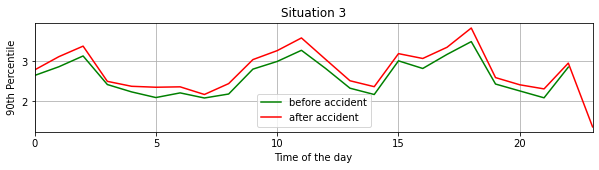

In [41]:
ax7 = df1.plot(y='median', c='g', figsize= (10,2), grid=True, label = 'before accident')
ax8 = df2.plot(y='m', c='r', figsize= (10,2), grid=True, ax=ax7, label='after accident')
ax8.set_ylabel("Median")
ax8.set_xlim(0, 23)
ax8.set_xlabel("Time of the day")
ax8.set_title("Situation 3")


ax13 = df1.plot(y='p90', c='g', figsize= (10,2), grid=True, label = 'before accident')
ax14 = df2.plot(y='nine', c='r', figsize= (10,2), grid=True, ax=ax13, label='after accident')
ax14.set_ylabel("90th Percentile")
ax14.set_xlabel("Time of the day")
ax14.set_xlim(0, 23)
ax14.set_title("Situation 3")

Text(0.5, 1.0, 'Number of trips per sample over time')

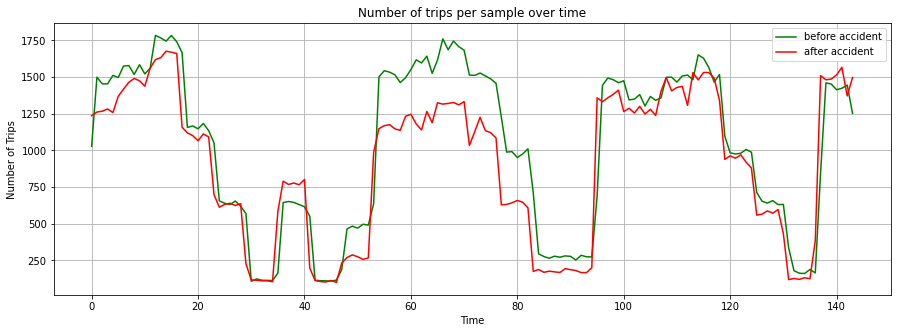

In [30]:
df1 = pd.read_csv('data.csv')
df1.head()

df11 = df1.iloc[:144, :].reset_index(drop=True)
df2 = df1.iloc[144:, :].reset_index(drop=True)
df2 =  df2.rename(columns={'avg': 'a', 'var': 'v', 'std': 's', 'median':'m', 'q1':'one', 'q3':'three', 'p90': 'nine'})
df1.head()


ax1 = df11.plot(y='numberOfTrips', c='g', figsize= (15,5), grid=True, label = 'before accident')
ax2 = df2.plot(y='numberOfTrips', c='r', figsize= (15,5), grid=True, ax=ax1, label='after accident')
ax2.set_ylabel("Number of Trips")
ax2.set_xlabel("Time")
ax2.set_title('Number of trips per sample over time')